In [103]:
import json
import pandas as pd
import matplotlib.pyplot as plt

tweet_data_path = r'c:\users\Ender\Desktop\Ipython\twitter_data.txt'

tweets_data = []
tweet_file = open(tweet_data_path,'r')

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
print("the number of tweets in this set of data is:",len(tweets_data))

        
    



the number of tweets in this set of data is: 24500


In [104]:
tweets = pd.DataFrame()

tweets['text'] = list(map(lambda tweet: tweet.get('text', None),tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet.get('lang', None),tweets_data))
tweets['country'] = list(map(lambda tweet: tweet.get('place').get('country') if tweet.get('place') != None else None,tweets_data))



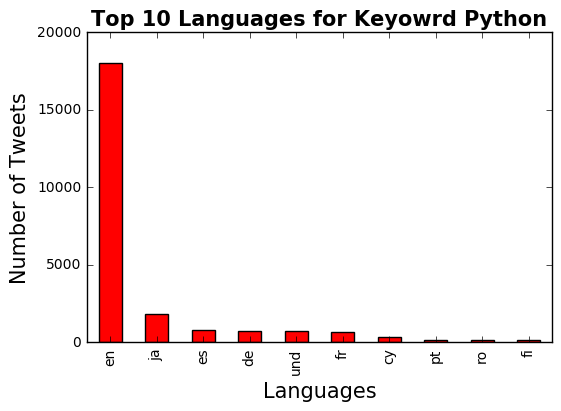

In [110]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', size=15)
ax.set_ylabel('Number of Tweets', size = 15)
ax.set_ylim(0,20000)
ax.set_title('Top 10 Languages for Keyowrd Python',fontsize = 15,fontweight = 'bold')
tweets_by_lang[:10].plot(ax=ax, kind='bar', color='red')
plt.show(3)

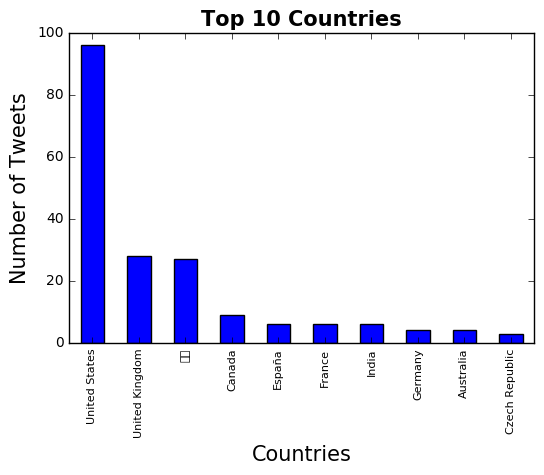

In [106]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of Tweets' , fontsize=15)
ax.set_title('Top 10 Countries', fontsize=15, fontweight='bold')
tweets_by_country[:10].plot(ax=ax, kind='bar', color='blue')
plt.show(6)

In [107]:
import re

def word_in_text(word, text):
    if text == None:
        return False
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

tweets['python'] = tweets['text'].apply(lambda tweet: word_in_text('Python', tweet))

print("the number of tweets that have the keyword Python that have been counted in pandas is:",tweets['python'].value_counts()[True])


the number of tweets that have the keyword Python that have been counted in pandas is: 22306


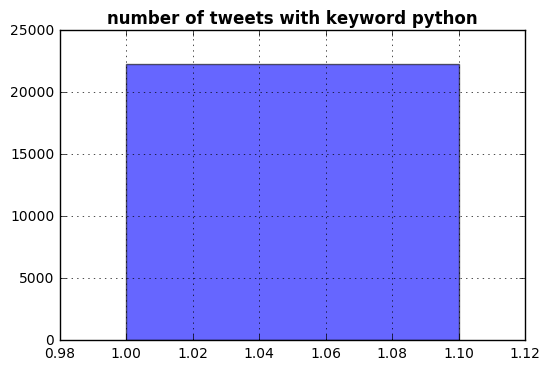

In [134]:
y = [tweets['python'].value_counts()[True]]
x = 1
width = .1
plt.bar(x, y, width, color="blue",alpha = .6)
plt.title("number of tweets with keyword python", weight = 'bold')
plt.grid()
plt.show()






In [139]:
tweets['programming'] = tweets['text'].apply(lambda tweet: word_in_text('programming', tweet))
tweets['tutorial'] = tweets['text'].apply(lambda tweet: word_in_text('tutorial', tweet))

tweets['relevant'] = tweets['text'].apply(lambda tweet: word_in_text('programming', tweet) or word_in_text('tutorial', tweet))

print("the number of tweets that also have the keyword programming is:",tweets['programming'].value_counts()[True])
print("the number of tweets that aslo have the keyword tutorial is:",tweets['tutorial'].value_counts()[True])
print("The number of tweets that have all three keywords is:",tweets['relevant'].value_counts()[True])



the number of tweets that also have the keyword programming is: 836
the number of tweets that aslo have the keyword tutorial is: 261
The number of tweets that have all three keywords is: 1081


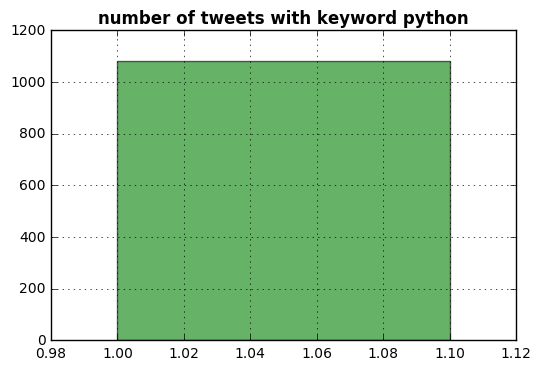

In [138]:
 y = tweets['relevant'].value_counts()[True]
x = 1
width = .1
plt.bar(x, y, width, color="green",alpha = .6)
plt.title("number of tweets with keyword python", weight = 'bold')
plt.grid()
plt.show()

In [146]:
def extract_link(text):
    if text == None:
        return ''
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    match = re.search(regex, text)
    if match:
        return match.group()
    return ''

tweets['link'] = tweets['text'].apply(lambda tweet: extract_link(tweet))
tweets_relevant = tweets[tweets['relevant'] == True]
tweets_relevant_with_link = tweets_relevant[tweets_relevant['link'] != '']
print("The number of tweets that have relevent links is:",len(tweets_relevant_with_link))
print(tweets_relevant_with_link[tweets_relevant_with_link['python'] == True]['link'])


The number of relevent tweets that have links is: 895
39       https://t.co/Hn6WeswgNq
71       https://t.co/Wn2gMdFQw0
177      https://t.co/fgnK5b2Ea3
179      https://t.co/oXtro1Nr54
212      https://t.co/eKVPpLnVSv
219                   https://t…
249      https://t.co/KxpO2jSGCx
278      https://t.co/ICJL5z8wQA
299      https://t.co/ICJL5z8wQA
348      https://t.co/JFkUuUjFDv
354      https://t.co/bUEReoN3lY
357      https://t.co/CdUFf90ewR
358      https://t.co/JFkUuUjFDv
361      https://t.co/ICJL5z8wQA
393      https://t.co/ICJL5z8wQA
399      https://t.co/t7s3xE9779
429      https://t.co/Wn2gMdFQw0
439      https://t.co/Hn6WeswgNq
441                    https://…
532      https://t.co/ICJL5z8wQA
538      https://t.co/X8aAjiASBr
574      https://t.co/ICJL5z8wQA
583      https://t.co/jsHC7bVfkM
597      https://t.co/2fR2TBMFUe
629      https://t.co/xmEAWzefpT
701      https://t.co/BWMeUoBaXk
736      https://t.co/oQCofhYf7R
750      https://t.co/eNXjc3vKjN
754      https://t.co/